# 1. Setup and Load Data

### 1.1 Import Necessary Libraries/Packages

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### 1.2 Look Through Images (EDA)

In [3]:
import cv2
import imghdr

C:\Users\jedia\AppData\Local\Temp\ipykernel_10676\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
img_dir = 'Training Data'

In [5]:
classes = os.listdir(img_dir)
classes

['NORMAL', 'PNEUMONIA']

In [6]:
class_counts = {class_name: len(os.listdir(os.path.join(img_dir, class_name))) for class_name in classes}

for class_name, count in class_counts.items():
    print(f'{class_name}: {count} images')

NORMAL: 1349 images
PNEUMONIA: 3883 images


#### Class imbalance present in dataset. Pneumonia has 2,534 more images than 'Normal' class. What strategy would be best to handle this class imbalance?

In [7]:
# Confirming NORMAL class image count
len(os.listdir(os.path.join(img_dir, 'NORMAL')))

1349

In [8]:
# Displaying files in NORMAL class
os.listdir(os.path.join(img_dir, 'NORMAL'))

['NORMAL-1003233-0001.jpeg',
 'NORMAL-1012843-0001.jpeg',
 'NORMAL-1014768-0001.jpeg',
 'NORMAL-1023731-0001.jpeg',
 'NORMAL-1029510-0001.jpeg',
 'NORMAL-1031320-0001.jpeg',
 'NORMAL-1034239-0001.jpeg',
 'NORMAL-1041364-0001.jpeg',
 'NORMAL-1044645-0001.jpeg',
 'NORMAL-1055663-0001.jpeg',
 'NORMAL-1063934-0001.jpeg',
 'NORMAL-1064313-0001.jpeg',
 'NORMAL-1064313-0002.jpeg',
 'NORMAL-1068231-0001.jpeg',
 'NORMAL-1068326-0001.jpeg',
 'NORMAL-1070073-0001.jpeg',
 'NORMAL-1070073-0002.jpeg',
 'NORMAL-1080088-0001.jpeg',
 'NORMAL-1097039-0001.jpeg',
 'NORMAL-1101909-0001.jpeg',
 'NORMAL-1128157-0001.jpeg',
 'NORMAL-1140710-0001.jpeg',
 'NORMAL-1150393-0001.jpeg',
 'NORMAL-1156778-0001.jpeg',
 'NORMAL-1165014-0001.jpeg',
 'NORMAL-1165014-0002.jpeg',
 'NORMAL-1170804-0001.jpeg',
 'NORMAL-1177627-0001.jpeg',
 'NORMAL-1196989-0001.jpeg',
 'NORMAL-1203236-0001.jpeg',
 'NORMAL-1206638-0001.jpeg',
 'NORMAL-1241506-0001.jpeg',
 'NORMAL-1243491-0001.jpeg',
 'NORMAL-1261648-0001.jpeg',
 'NORMAL-13115

In [9]:
# confirming PNEUMONIA class image count
len(os.listdir(os.path.join(img_dir, 'PNEUMONIA')))

3883

In [10]:
# Displaying files in PNEUMONIA class
os.listdir(os.path.join(img_dir, 'PNEUMONIA'))

['BACTERIA-1008087-0001.jpeg',
 'BACTERIA-1025587-0001.jpeg',
 'BACTERIA-1027194-0001.jpeg',
 'BACTERIA-1033441-0001.jpeg',
 'BACTERIA-103798-0001.jpeg',
 'BACTERIA-103798-0002.jpeg',
 'BACTERIA-1039608-0001.jpeg',
 'BACTERIA-1040986-0001.jpeg',
 'BACTERIA-1041881-0001.jpeg',
 'BACTERIA-1041881-0002.jpeg',
 'BACTERIA-104960-0001.jpeg',
 'BACTERIA-1065620-0001.jpeg',
 'BACTERIA-1065620-0002.jpeg',
 'BACTERIA-1069837-0001.jpeg',
 'BACTERIA-1069837-0002.jpeg',
 'BACTERIA-1074715-0001.jpeg',
 'BACTERIA-1076722-0001.jpeg',
 'BACTERIA-1083680-0001.jpeg',
 'BACTERIA-1083680-0002.jpeg',
 'BACTERIA-1083680-0003.jpeg',
 'BACTERIA-1083680-0004.jpeg',
 'BACTERIA-1083680-0005.jpeg',
 'BACTERIA-1083680-0006.jpeg',
 'BACTERIA-1083680-0007.jpeg',
 'BACTERIA-1083680-0008.jpeg',
 'BACTERIA-1083680-0009.jpeg',
 'BACTERIA-1083680-0010.jpeg',
 'BACTERIA-1083680-0011.jpeg',
 'BACTERIA-1083680-0012.jpeg',
 'BACTERIA-1083680-0013.jpeg',
 'BACTERIA-1083680-0014.jpeg',
 'BACTERIA-1083680-0015.jpeg',
 'BACTERIA-

In [11]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [12]:
image_exts[0]

'jpeg'

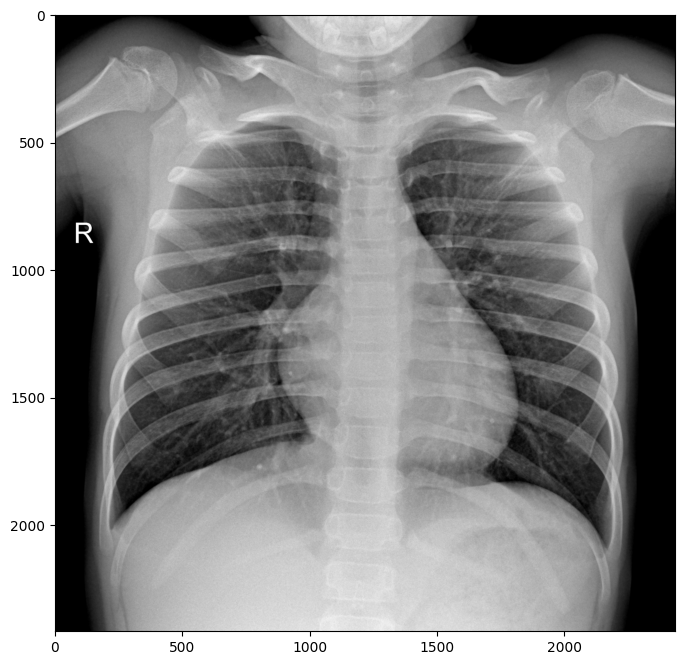

In [13]:
# Accessing and Displaying Normal X-ray from directory

img = cv2.imread(os.path.join('Training Data', 'NORMAL', 'NORMAL-28501-0001.jpeg'))

plt.figure(figsize=(10, 8))

plt.imshow(img)
plt.show()

In [14]:
img.shape

(2418, 2434, 3)

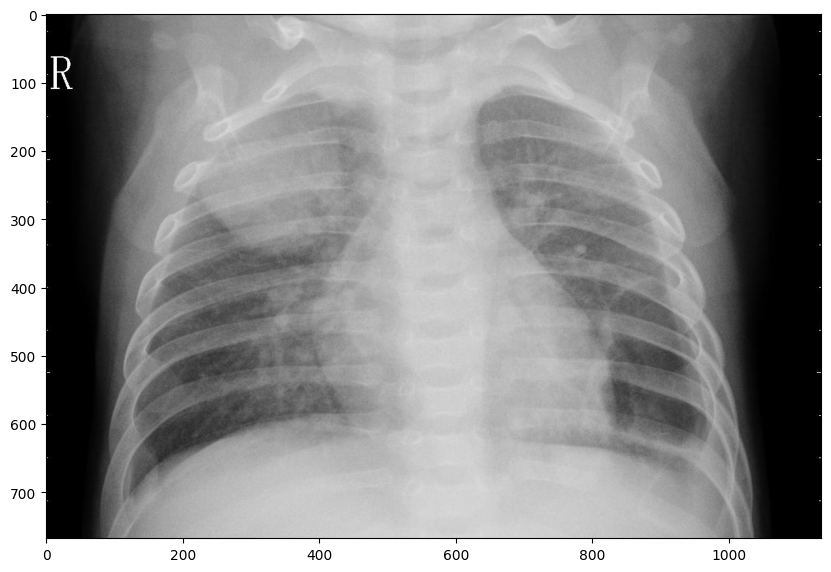

In [15]:
# Accessing and Displaying Pneumonia(Bacterial) X-ray from directory

img_pn_b = cv2.imread(os.path.join('Training Data','PNEUMONIA','BACTERIA-84621-0001.jpeg'))

plt.figure(figsize=(10, 8))

plt.imshow(img_pn_b)
plt.show()

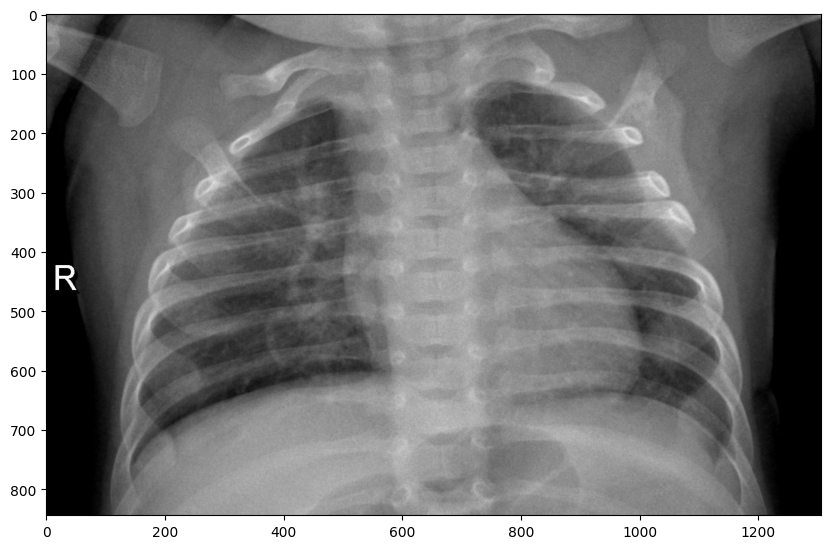

In [16]:
# Accessing and Displaying Pneumonia(Viral) X-ray from directory

img_pn_v = cv2.imread(os.path.join('Training Data','PNEUMONIA','VIRUS-4757979-0003.jpeg'))

plt.figure(figsize=(10, 8))

plt.imshow(img_pn_v)
plt.show()

### 1.3 Load Data

In [82]:
data = tf.keras.utils.image_dataset_from_directory??

In [17]:
# Loading Data Creating Data Pipeline
#data = tf.keras.utils.image_dataset_from_directory('Training Data')

Found 5232 files belonging to 2 classes.


In [18]:
# Creating data iterator so images in directory can be iterated over
data_iterator = data.as_numpy_iterator()
data_iterator

In [19]:
# Storing Training Data images as numpy arrays 
# class labels 1 and 0 included 
batch = data_iterator.next()
batch 

(array([[[[ 70.7207   ,  70.7207   ,  70.7207   ],
          [ 79.43935  ,  79.43935  ,  79.43935  ],
          [ 75.38867  ,  75.38867  ,  75.38867  ],
          ...,
          [ 56.840187 ,  56.840187 ,  56.840187 ],
          [ 55.542763 ,  55.542763 ,  55.542763 ],
          [ 52.666016 ,  52.666016 ,  52.666016 ]],
 
         [[ 73.107315 ,  73.107315 ,  73.107315 ],
          [ 79.99609  ,  79.99609  ,  79.99609  ],
          [ 77.526825 ,  77.526825 ,  77.526825 ],
          ...,
          [ 51.79297  ,  51.79297  ,  51.79297  ],
          [ 50.998356 ,  50.998356 ,  50.998356 ],
          [ 50.998047 ,  50.998047 ,  50.998047 ]],
 
         [[ 73.41814  ,  73.41814  ,  73.41814  ],
          [ 76.09622  ,  76.09622  ,  76.09622  ],
          [ 77.087036 ,  77.087036 ,  77.087036 ],
          ...,
          [ 55.787346 ,  55.787346 ,  55.787346 ],
          [ 50.476154 ,  50.476154 ,  50.476154 ],
          [ 49.365406 ,  49.365406 ,  49.365406 ]],
 
         ...,
 
         [[ 

In [20]:
# Images & Class Labels
len(batch)

2

In [21]:
# Images stored as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [22]:
# Class Labels stored as binary values PNEUMONIA-1, NORMAL-0
batch[1] # Accesses Class label of batch

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

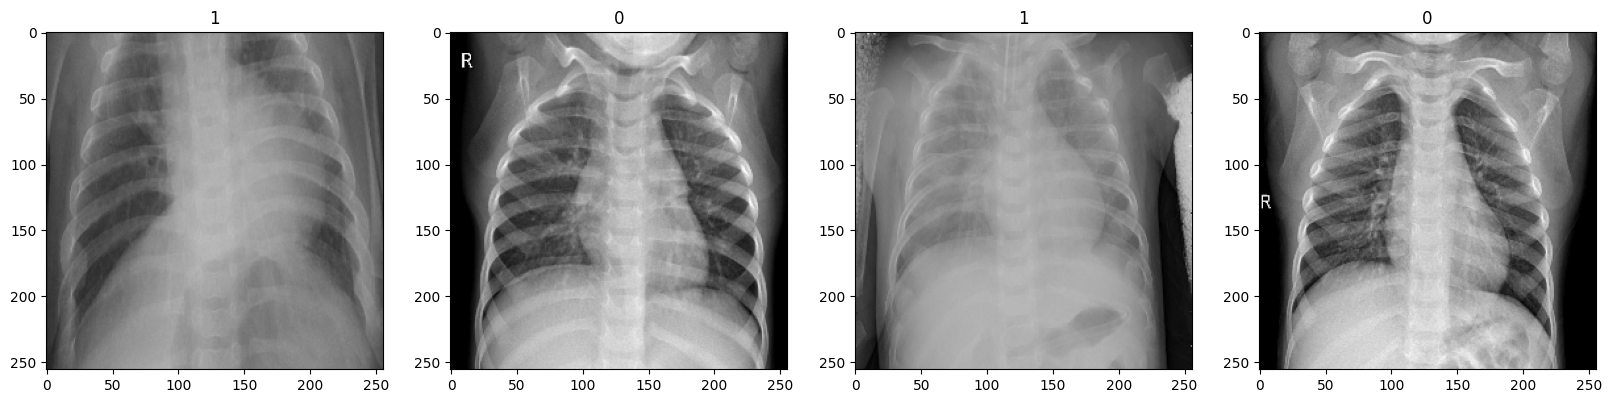

In [23]:
# Displaying 1-Pneumonia & 0-Normal X-rays for comparison
fix, ax = plt.subplots (ncols=4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batch[1][index])

#### 1 - Pneumonia
#### 0 - Normal

# 2. Preprocess Data

### 2.1 Scale Data

In [24]:
data = data.map(lambda x,y: (x/255, y))
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
scaled_iterator = data.as_numpy_iterator()
scaled_iterator

In [26]:
scaled_iterator.next()[0].min()

0.0

In [27]:
scaled_iterator.next()[0].max()

1.0

### 2.2 Split Data Into Necessary Partitions

In [74]:
#len(data) # Ouput indicates number of batches present in dataset 

In [75]:
#train_size = int(len(data)*.7)
#val_size = int(len(data)*.2)+1
#test_size = int(len(data)*.1)+1

In [76]:
#train_size

In [77]:
#val_size

In [78]:
#test_size

In [79]:
#train_size+val_size+test_size

In [34]:
#train = data.take(train_size)
#val = data.skip(train_size).take(val_size)
#test = data.skip(train_size+val_size).take(test_size)

In [66]:
#len(train)

114

# 3. Deep Modeling

### 3.1 Construct Deep Learning Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  img_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  img_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size=32)

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### 3.2 Train Model

In [40]:
logdir = 'logs'

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


114/114 [==============================] - 71s 572ms/step - loss: 0.2981 - accuracy: 0.8747 - val_loss: 0.1349 - val_accuracy: 0.9470
Epoch 2/20
114/114 [==============================] - 63s 545ms/step - loss: 0.1047 - accuracy: 0.9671 - val_loss: 0.1278 - val_accuracy: 0.9479
Epoch 3/20
114/114 [==============================] - 64s 552ms/step - loss: 0.0874 - accuracy: 0.9671 - val_loss: 0.0715 - val_accuracy: 0.9716
Epoch 4/20
114/114 [==============================] - 63s 542ms/step - loss: 0.0767 - accuracy: 0.9709 - val_loss: 0.0829 - val_accuracy: 0.9650
Epoch 5/20
114/114 [==============================] - 62s 536ms/step - loss: 0.0606 - accuracy: 0.9783 - val_loss: 0.0746 - val_accuracy: 0.9678
Epoch 6/20
114/114 [==============================] - 64s 551ms/step - loss: 0.0472 - accuracy: 0.9819 - val_loss: 0.0591 - val_accuracy: 0.9716
Epoch 7/20
114/114 [==============================] - 64s 547ms/step - loss: 0.0324 - accuracy: 0.9890 - val_loss: 0.1143 - val_

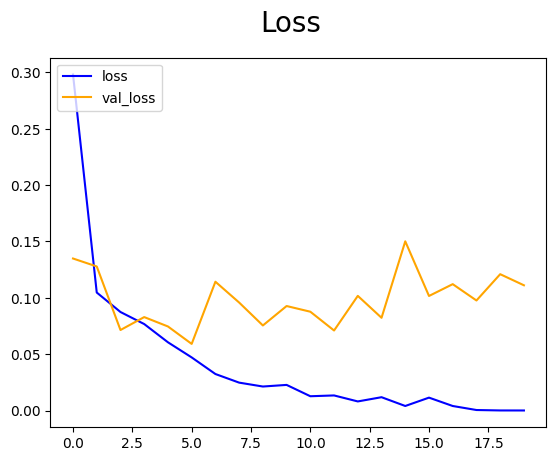

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

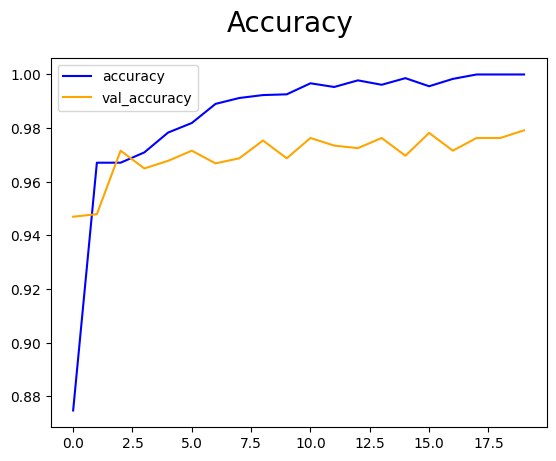

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

### 4.1 Evaluate

In [45]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
len(test)

17

In [48]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 317ms/step


In [49]:
print(f'Precision:{pre.result().numpy()}, Recall{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9828850626945496, Recall0.9852941036224365, Accuracy:0.9753788113594055


### 4.2 Test

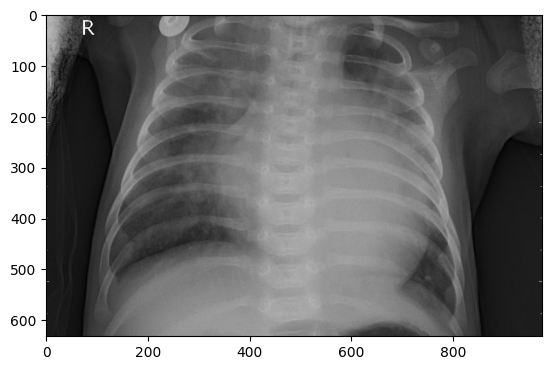

In [50]:
test_img = cv2.imread(os.path.join('Test Data','PNEUMONIA','BACTERIA-3865791-0001.jpeg'))
plt.imshow(test_img)
plt.show()

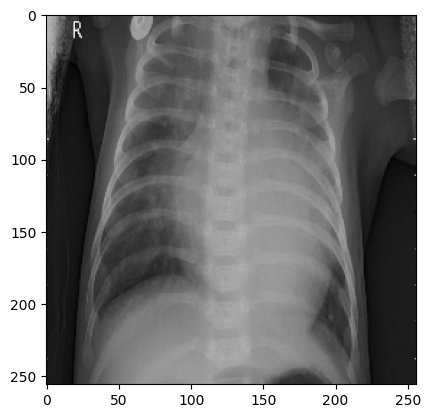

In [51]:
resize = tf.image.resize(test_img,(256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()            

In [52]:
resize.shape

TensorShape([256, 256, 3])

In [53]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [54]:
y_pred = model.predict(np.expand_dims(resize/255, 0))
y_pred

1/1 [==============================] - 0s 80ms/step


array([[1.]], dtype=float32)

In [55]:
if y_pred > 0.5:
    print(f'Predicted class has Pneumonia')
else:
    print(f'Predicted class does not have Pneumonia')

Predicted class has Pneumonia


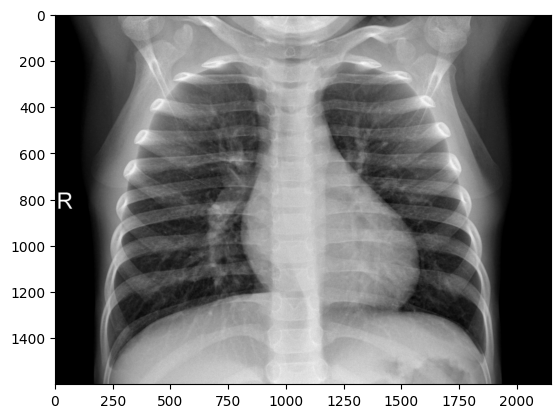

In [56]:
test_img2 = cv2.imread(os.path.join('Test Data','NORMAL','NORMAL-5661793-0001.jpeg'))
plt.imshow(test_img2)
plt.show()

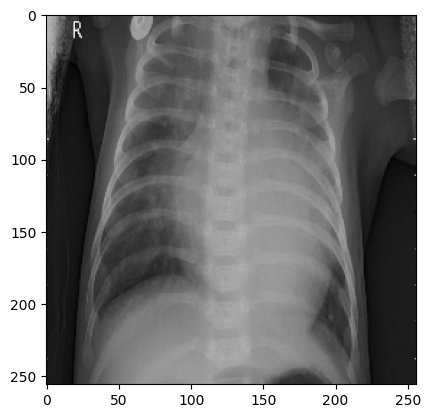

In [57]:
resize2 = tf.image.resize(test_img2,(256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()            

In [58]:
resize2.shape

TensorShape([256, 256, 3])

In [59]:
np.expand_dims(resize2, 0).shape

(1, 256, 256, 3)

In [60]:
y_pred2 = model.predict(np.expand_dims(resize2/255, 0))
y_pred2

1/1 [==============================] - 0s 85ms/step


array([[0.01514229]], dtype=float32)

In [61]:
if y_pred2 > 0.5:
    print(f'Predicted class has Pneumonia')
else:
    print(f'Predicted class does not have Pneumonia')

Predicted class does not have Pneumonia


# 5. Save the Model

In [62]:
from tensorflow.keras.models import load_model

In [63]:
model.save(os.path.join('Models', 'xrayimageclassification(1).keras'))

In [ ]:
xray_model = load_model(os.path.join('Models', 'xrayimageclassification(1).keras')

In [ ]:
new_model.predict(np.expand_dims(resize/255,0))